**Pipelines de ejecución**
---

Los proyectos de aprendizaje automático muchas veces involucran múltiples etapas y transformaciones en los datos de entrada para poder conseguir el resultado apropiado. Este proceso se puede simplificar de manera sistemática con la ayuda de objetos especiales que controlan la cadena de entradas y salidas de datos.

# **1. Dependencias**
---
Importamos las librerías necesarias y definimos algunas funciones básicas de visualización que vamos a usar en algunos ejemplos.


### **1.1. Dependencias**
---
Para la construcción de modelos y ejecución de procedimientos metodológicos de aprendizaje automático, utilizaremos la librería _Scikit-learn_ (**`sklearn`**) y varias de sus funciones y conjuntos de datos.

In [1]:
# Actualizamos scikit-learn a la última versión
# !pip install -U scikit-learn

# Importamos scikit-learn
import sklearn

Importamos además algunas librerías básicas y configuraciones de *Python*.

In [2]:
# Librerías básicas NumPy, Pandas, Matplotlib y Seaborn.
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [3]:
# Configuraciones para las librerías y módulos usados.

# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')

# Configuramos el formato por defecto de la
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme()

In [4]:
# Versiones de las librerías usadas.

!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Plotly', plotly.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.11.5
NumPy 1.26.0
Pandas 2.1.1
Matplotlib 3.8.0
Seaborn 0.13.0
Plotly 5.17.0
Scikit-learn 1.3.2


Esta actividad se realizó con las siguientes versiones:
*  *Python*: 3.7.10
*  *NumPy*:  1.19.5
*  *Pandas*: 1.1.5
*  *Matplotlib*:  3.2.2
*  *Seaborn*:  0.11.1
*  *Plotly*: 4.4.1
*  *Scikit-learn*: 0.24.1

### **1.2. Funciones de utilidad y visualización**
---

Para ilustrar los ejemplos discutidos en este material utilizaremos algunas funciones que permiten visualizar de manera general los datos, junto a las funciones de predicción obtenidas con cada modelo.

> **Nota**: *Matplotlib*, *Seaborn* y *Plotly* se encuentran por fuera del alcance de este módulo. No es necesario que entienda estas funciones en detalle para sacar partido del resto del contenido puesto a su disposición. Usted decide si leer o no estas funciones en profundidad. Si decide omitir esta sección, continúe directamente con la siguiente sección, en donde se discutirán los conjuntos de datos que vamos a utilizar.

In [5]:
# Gráfica de la varianza explicada acumulada.

def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 105, figsize = (10, 6))
  plt.title('Curva acumulativa de la varianza explicada VS número de componentes principales')
  plt.xlabel('Número de componentes principales')
  plt.ylabel('Varianza explicada acumulativa')

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)
  plt.show()

In [6]:
# Gráfica para observar la distribución en clusters de las compañías.

def plot_company_distribution(X, y, text):
  # Nuevo DataFrame con las dos componentes principales y el cluster obtenido.

  stock_pca = pd.DataFrame(
      {'x': X[:,0],
      'y': X[:,1],
      'cluster': pd.Series(y + 1, dtype = 'string'),
      'name': text}
  )
  stock_pca = stock_pca.sort_values(by = 'cluster')
  # Usamos Plotly para graficar los clusters.

  fig = px.scatter(stock_pca, x="x", y="y", text="name", color = 'cluster', size = np.full(len(stock_pca), 100))
  fig.update_traces(textposition='top center')
  fig.update_layout(
      height = 800,
      title_text = 'Agrupamiento de compañías por movimientos en la bolsa',
      dragmode = 'pan',
      font = dict(size = 16)
  )
  fig.show(config = dict({'scrollZoom': True}))

# **2. Conjuntos de datos**
---

Para los ejemplos desarrollados en el transcurso de material, se usarán datos de  *Scikit-Learn* de carácter real (usando *Loaders* y otras fuentes) y sintético (usando *Generators*).

#### **2.1. Movimientos de la bolsa de valores**
---


Este *dataset* contiene información simplificada de los movimientos financieros en la bolsa de valores de $60$ compañías entre 2010 y 2013.

> **Nota:** Estos [datos](https://github.com/wblakecannon/DataCamp/blob/master/19-unsupervised-learning-in-python/data/company-stock-movements-2010-2015-incl.csv) fueron obtenidos del curso [*Unsupervised Learning in Python*](https://www.datacamp.com/courses/unsupervised-learning-in-python) de *DataCamp*.

In [7]:
# Descargamos el archivo.
!wget -c 'https://docs.google.com/uc?export=download&id=1brlIo5DUUkwxDo9jkesB8f7_ZaWmd7fv' -O stock_market.csv.gz

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
'https://docs.google.com/uc?export=download: Unsupported scheme.
'id' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# Cargamos los datos en un DataFrame
stock_df = pd.read_csv("stock_market.csv", index_col=0)

stock_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


Cada característica corresponde a un día y contiene el cambio en el valor de las acciones de cada compañía. Este es un conjunto de datos de gran dimensionalidad, con un total de $963$ días considerados como características, y $60$ compañías como sus observaciones.

In [9]:
# Compañías consideradas en este conjunto de datos.
stock_df.index

Index(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar',
       'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron',
       'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics',
       'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot',
       'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase',
       'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard',
       'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar',
       'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble',
       'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever',
       'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon',
       'Xerox', 'Yahoo'],
      dtype='object')

#### **2.2. Noticias de distintas temáticas *20 news***
---

**20_newsgroups** es un conjunto de datos con publicaciones de cerca de $18000$ grupos de noticias en $20$ temas de discusión distintos. Es un ejemplo muy popular de la aplicación de modelos de clasificación y agrupamiento en texto. En esta ocasión usaremos el método de *Scikit-Learn* **` sklearn.datasets.fetch_20newsgroups`** para cargar los conjuntos de entrenamiento y prueba.

In [10]:
# Cargamos el dataset
from sklearn.datasets import fetch_20newsgroups
data_20_news = fetch_20newsgroups()

# Temas disponibles en el dataset.
topics = data_20_news.target_names

topics

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
# Primer post del conjunto de datos
print(data_20_news.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [12]:
# Tema del post anterior

print(f"Tema: {topics[data_20_news.target[0]]}")

Tema: rec.autos


# **3. Pipelines de ejecución**
---
Inicialmente plantearemos un ejemplo de tarea de aprendizaje automático que involucra el uso de distintas etapas de datos.

Para esto vamos a utilizar el conjunto de datos de movimientos en la bolsa y queremos obtener una visualización de las compañías que tienen un comportamiento en la bolsa similar en los mismos periodos de tiempo. Esta tarea cae en la clasificación de **agrupamiento** pues no conocemos datos de ejemplo que permitan realizar un aprendizaje supervisado y únicamente nos interesa conocer su distribución en grupos distintos.

Empecemos por cargar el conjunto de datos:

In [13]:
stock_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


## **3.1. Metodología tradicional**
---

Inicialmente, vamos a abordar este problema de una manera secuencial y guiada, utilizando las funciones y métodos discutidos en el transcurso del módulo.

### **3.1.1. Preprocesamiento**
---
En este caso, consideraremos que dos compañías tienen un comportamiento similar en el mercado únicamente distinguiendo entre **ganancias** y **pérdidas**, sin importar su magnitud. Por ejemplo, $2$ empresas de tecnología pueden tener pérdidas en los mismos momentos de acuerdo con las noticias que rodean su industria. Para esto, vamos a convertir todos los valores en $1$ si son positivos (ganancias) y -1 en otro caso (pérdidas). Este es el equivalente de utilizar el **signo** de cada movimiento. Para esto, usaremos la función **`np.sign`**:

In [14]:
# Función para convertir los datos en 1 o -1.
stock_sign = np.sign(stock_df)

stock_sign.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
AIG,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
Amazon,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
American express,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
Boeing,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0


Note que es posible que las acciones no hayan cambiado y en tal caso el valor contenido en el _dataset_ es de $0$ (no tiene signo).

### **3.1.2. Reducción de dimensionalidad con `PCA`**
---
El *dataset* tiene $963$ características, correspondientes a los movimientos de un día en la bolsa. Vamos a graficar la curva acumulativa de la varianza explicada versus el número de componentes principales.
¿Cuántos componentes son suficientes para presentar el $70\%$, $80\%$ o $90\%$ de la varianza de los datos?

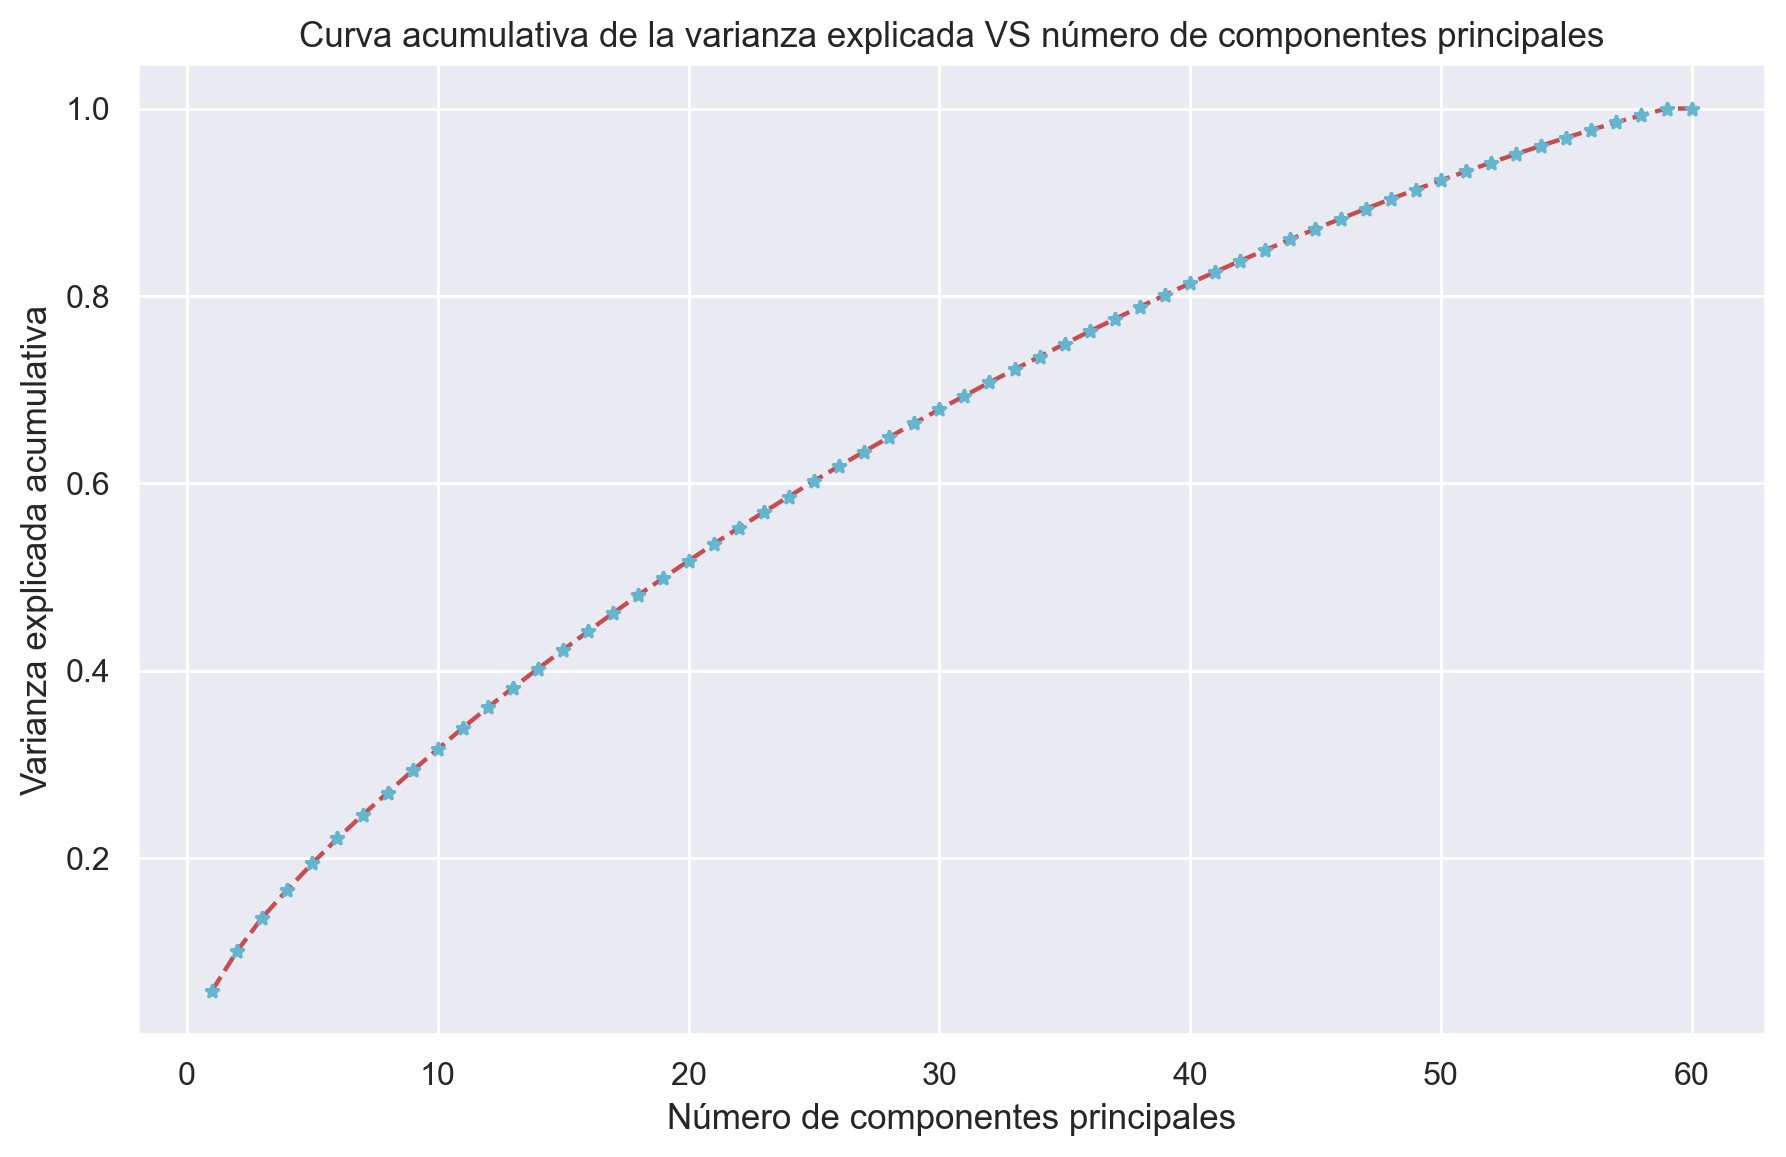

In [15]:
# Algoritmo de análisis de componentes principales PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # Se calculan y almacenan todos los componentes.

pca.fit_transform(stock_sign)
varianza_expl = pca.explained_variance_ratio_

cumulative_explained_variance_plot(varianza_expl)

Como queremos visualizar la distribución de las compañías en los *cluster* optamos por quedarnos con únicamente $2$ componentes, uno para el eje $x$ y otro para el eje $y$.

In [16]:
pca = PCA(n_components=2)

stock_pca = pca.fit_transform(stock_sign)

stock_pca[:5]

array([[-3.06997356, -8.07147693],
       [-5.12078456, -3.06789547],
       [-1.6565936 , -6.61161427],
       [-4.26133117, -1.41531823],
       [ 1.75826217, -0.47179039]])

Observe que, si bien _PCA_ admite usar como entrada un objeto *DataFrame* de *Pandas*, la salida es un arreglo de *NumPy*, perdiendo los nombres de las columnas.

### **3.1.3. Agrupamiento con el algoritmo $k$-_means_**
---
Ahora, usaremos el método **`KMeans`** con $7$ clusters y visualizaremos los clusters en el plano de $2$ dimensiones dado por las componentes principales obtenidas con **`PCA`**.

In [17]:
# Algoritmo de agrupamiento K-means

from sklearn.cluster import KMeans
n_clusters = 7

y = KMeans(n_clusters = n_clusters).fit_predict(stock_pca)

y

  File "c:\Users\Daniel Avila\.pyenv\pyenv-win\versions\3.11.5\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([3, 5, 3, 5, 4, 5, 2, 0, 0, 1, 0, 3, 2, 0, 3, 5, 0, 3, 5, 2, 4, 0,
       3, 4, 3, 6, 5, 1, 1, 4, 3, 4, 0, 3, 0, 5, 4, 2, 1, 6, 1, 6, 2, 0,
       0, 0, 2, 3, 0, 2, 3, 3, 2, 5, 4, 5, 1, 2, 5, 3])

Ya tenemos los datos resumidos en dos características y la etiqueta correspondiente al *cluster* al que corresponde cada compañía. Podemos usar esta información para visualizar los resultados.

In [18]:
plot_company_distribution(stock_pca, y, stock_df.index)

Tal como se pensaba, las compañías del mismo sector de la economía (petroleras, tecnológicas, bancarias, etc) tienden a tener movimientos similares.

Mirando en retrospectiva, realizamos $3$ transformaciones significativas en nuestros datos:

1. Transformación específica del dominio convirtiendo los valores en $-1$, $0$ y $1$ con **`np.sign`**. (De **`stock_df`** a  **`stock_sign`**)
2. Reducción de la dimensionalidad con _PCA_. (De **`stock_sign`** a **`stock_pca`**)
3. Agrupamiento con el algoritmo $k$-_means_. (De **`stock_pca`** a **`y`**)

En este ejemplo no es grave la cantidad de código escrito y ejecutado, pero se puede encontrar casos de estudio en los que no sea tan conveniente controlar el proceso con múltiples variables para cada caso, o donde se necesite realizar una validación cruzada y obtener la mejor configuración de parámetros.
Para combatir este problema surgen los **_Pipelines_**.

## **3.2. Objetos `Pipeline`**
---
Los *pipelines* encadenan múltiples procesos en uno solo. Por ejemplo, transformaciones de los datos, reducción de la dimensionalidad  y entrenamiento de modelos supervisados y no supervisados. De esta manera, es posible automatizar una secuencia de transformaciones que pueden ser usados tanto en entrenamiento como en evaluación con datos en crudo.

En la siguiente imagen puede ver de manera gráfica el concepto, con una anotación de las transformaciones y métodos encapsulados en el proceso:


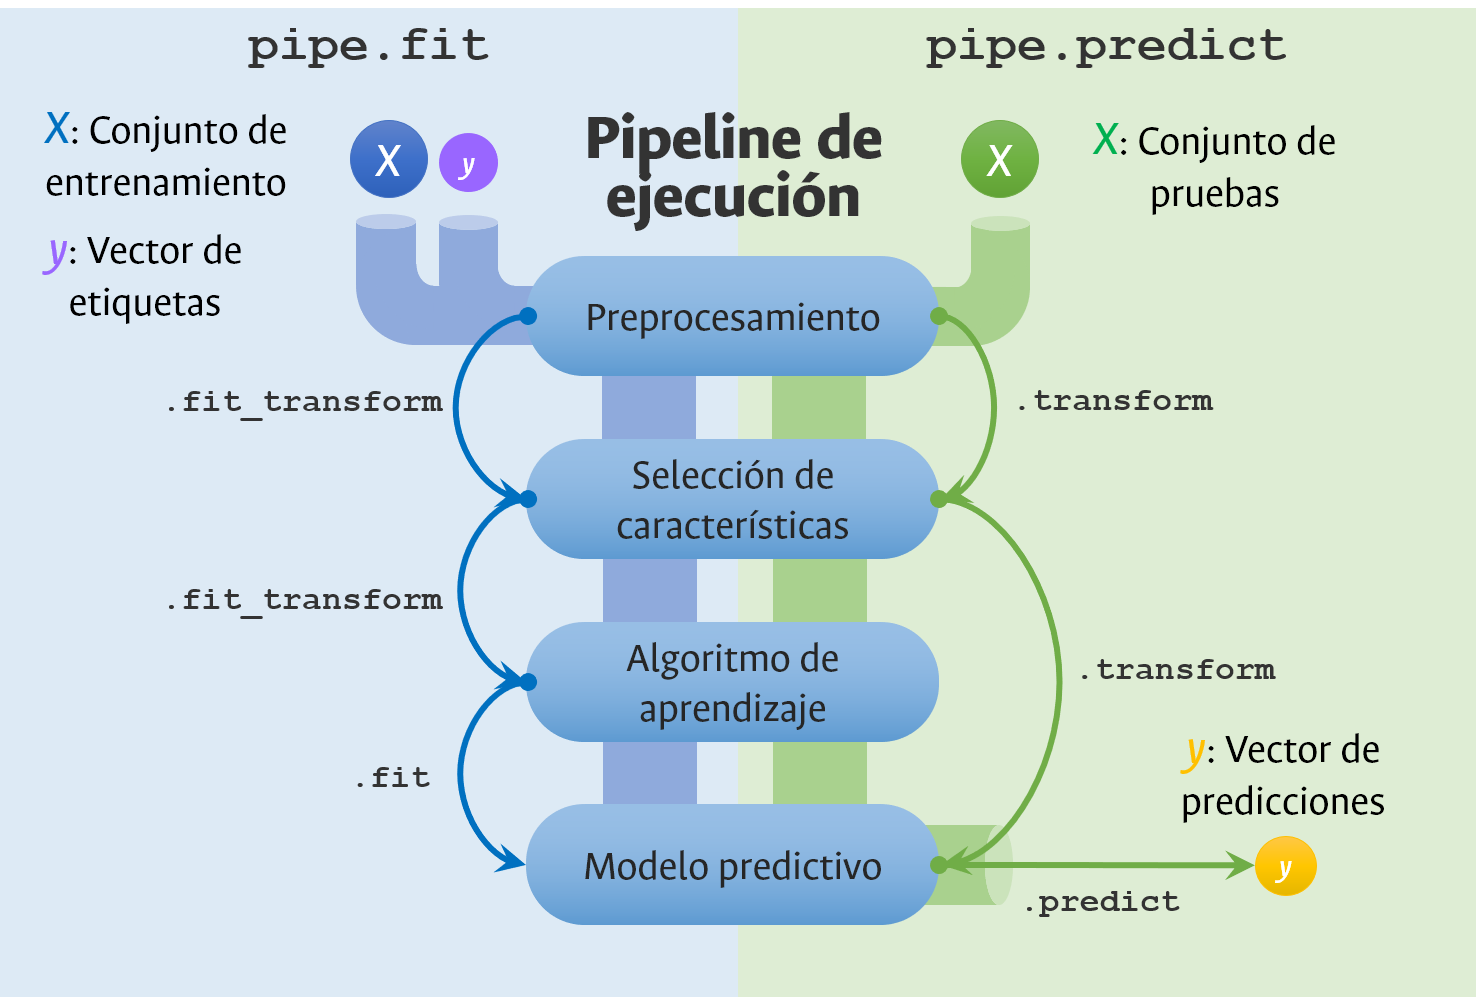

*Scikit-Learn* implementa esto con la clase **`Pipeline`**. Usar *pipelines* ofrece varias ventajas:

* **Conveniencia y encapsulación:** solo debes llamar **`fit`** y **`predict`** una vez en tus datos para ajustar una secuencia completa de estimadores.

* **Búsqueda de hiperparámetros conjunta:** podrá hacer búsqueda de los hiperparámetros de las transformaciones y modelo al mismo tiempo.

* **Seguridad:** los _pipelines_ ayudan a evitar que se filtre información de los datos de prueba al modelo entrenado. Los mismos ejemplos son usados para entrenar las transformaciones y los modelos.

El constructor **`Pipeline`** recibe como argumento una lista de estimadores, como modelos de clasificación o algoritmos de transformación, junto a un nombre que sirve como indicador para la configuración posterior de cada uno.

### **3.2.1. Estimador con función usando `FunctionTransformer`**
---
*Scikit-Learn* ofrece una variedad de estos [estimadores](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Sin ir más lejos, todos los algoritmos de clasificación, regresión y agrupamiento vistos en el curso son estimadores y pueden incluirse en un *pipeline* de ejecución.

Sin embargo, estos últimos suelen ubicarse al final para generar una predicción de aprendizaje automático. Otra clase de estimadores importantes son los de [transformación](https://scikit-learn.org/stable/data_transforms.html) y preprocesamiento de datos.

Por ejemplo, con el estimador transformador **`FunctionTransformer`** podemos realizar una operación de transformación a partir de una función (incluso una definida por nosotros).

In [19]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func = np.sign) # Usamos la función np.sign

transformer.transform(stock_df).head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
AIG,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
Amazon,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
American express,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
Boeing,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0


De esta manera podríamos obtener el mismo resultado que al ejecutar la función sobre nuestro conjunto de datos.

### **3.2.2. Declaración de *Pipelines***
---
En esta sección vamos a construir un *pipeline* con los siguientes $3$ pasos:

1. **`FunctionTransformer`** con la función **`np.sign`**
2. **`PCA`** con $2$ componentes.
3. **`KMeans`** con $7$ *clusters*.

Para usarlos en un *pipeline* se debe crear una lista de tuplas de la siguiente manera:


In [20]:
# Estimadores por defecto a usar en el pipeline.

estimators = [('transform', FunctionTransformer(np.sign)),
              ('pca', PCA(n_components = 2)),
              ('kmeans', KMeans(n_clusters = 7))]

Ahora, pasamos la lista como argumento de la función **`Pipeline`**.

In [21]:
# Módulo de creación y ejecución de Pipelines.
from sklearn.pipeline import Pipeline

pipe = Pipeline(estimators)

pipe

Pipeline(steps=[('transform', FunctionTransformer(func=<ufunc 'sign'>)),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=7))])

Ahora, podemos realizar operaciones como **`fit`** y **`predict`** directamente en el *pipeline* ingresando los argumentos del primer estimador de la lista.

In [22]:
y = pipe.fit_predict(stock_df) # Usamos el DataFrame original

y

array([2, 5, 2, 5, 6, 5, 3, 0, 0, 1, 0, 2, 3, 0, 2, 5, 0, 2, 5, 3, 6, 0,
       2, 6, 2, 4, 5, 1, 1, 6, 2, 4, 0, 2, 0, 5, 6, 3, 1, 4, 1, 4, 3, 0,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 5, 6, 5, 1, 3, 5, 2])

Para la visualización original también utilizábamos los datos intermedios obtenidos por PCA para representar las posiciones en $x$ y en $y$ de la gráfica. Para esto, *Scikit-Learn* permite utilizar *slicing* en los objetos *Pipeline*, como se haría con un arreglo o una lista. El resultado es otro *pipeline* con únicamente los estimadores ubicados en los índices o rangos de índices indicados.

A continuación, utilicemos un sub-pipeline de los dos primeros estimadores (**`FunctionTransformer`** y **`PCA`**)

In [38]:
# Indexar pasos de un Pipeline es tan sencillo como indexar una lista.
subpipe = pipe[:3]

subpipe

Pipeline(steps=[('transform', FunctionTransformer(func=<ufunc 'sign'>)),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=7))])

Calculemos nuevamente los datos obtenidos hasta el paso de PCA. En este caso no es necesario hacer el entrenamiento de nuevo, por lo que en vez de utilizar **`fit_transform`** podemos usar simplemente el método **`transform`** y obtener el mismo resultado sin necesidad de realizar todo el proceso.

In [39]:
pca_xy = subpipe.transform(stock_df)

pca_xy.shape

(60, 7)

Finalmente, podemos usar los datos obtenidos con los *pipelines* de ejecución en la visualización.

In [40]:
plot_company_distribution(pca_xy, y, stock_df.index)

Como se puede observar, obtenemos la misma clasificación de *clusters* que al realizar el proceso de forma manual.

Los objetos *pipeline* ofrecen otras funciones para controlar la configuración de los estimadores internos. Por ejemplo, con el método **`set_params`** podemos reasignar alguno de los hiperparámetros de sus estimadores. Para hacer esto, el nombre de los argumentos sigue el siguiente formato:

> **`[estimator_id]__[parámetro]`**



Tenga en cuenta que el **`estimator_id`** es el primer valor de la tupla usada como argumento en la creación del *pipeline* (en este caso las *id* son **`'transform'`**, **`'pca'`** y **`'kmeans'`**).

> **Nota:** el separador del estimador y su parámetro está conformado por dos barras al piso.


Cambiemos el número de *clusters* de *K-means*:

In [41]:
pipe.set_params(kmeans__n_clusters = 5)
y = pipe.fit_predict(stock_df)

plot_company_distribution(pca_xy, y, stock_df.index)

## **3.3. Validación cruzada de *pipelines***
---

Una de las utilidades principales del uso de *pipelines* en procesos de aprendizaje automático es la posibilidad de realizar validación cruzada en varios estimadores de manera directa en un solo llamado de funciones como **`GridSearchCV`**.

Para este ejemplo usaremos el *dataset* de noticias ***20newsgroups***. Nuestro objetivo es diferenciar el tema de los textos de distintas publicaciones de distintos grupos de noticias destinados a varias temáticas. En particular, vamos a construir un modelo para distinguir entre publicaciones en grupos de noticias religiosas y de ateísmo.

In [42]:
# Cargamos solo posts de estas dos categorías.
categories = ['alt.atheism', 'talk.religion.misc']

In [43]:
# Cargamos los datos de entrenamiento de texto de estas 2 categorías.
text_data = fetch_20newsgroups(subset ='train',
                          categories = categories)

print(f"{len(text_data.filenames)} documentos y {len(text_data.target_names)} categorías.")

857 documentos y 2 categorías.


Obtenemos la matriz de datos **`X`** y su vector de etiquetas **`y`** de los documentos cargados.

In [44]:
# Cargamos los datos en formato X, y
X_train = text_data.data
y_train = text_data.target

Ahora, repetimos el proceso para obtener la partición de prueba en el formato adecuado:

In [45]:
# Realizamos el mismo proceso para los datos de prueba.
text_data_test = fetch_20newsgroups(subset ='test', categories = categories)

print(f"{len(text_data_test.filenames)} documentos y {len(text_data_test.target_names)} categorías.")

X_test = text_data_test.data
y_test = text_data_test.target

570 documentos y 2 categorías.


### **3.3.1. Conteo de tokens con `CountVectorizer`**
---
Al realizar una inspección inicial podemos notar que la matriz $X$ está compuesta por observaciones con una única característica de texto.:

In [46]:
# Primer elemento de la lista obtenida.
print(X_train[0])

From: mangoe@cs.umd.edu (Charley Wingate)
Subject: Benediktine Metaphysics
Lines: 24

Benedikt Rosenau writes, with great authority:

>     IF IT IS CONTRADICTORY IT CANNOT EXIST.

"Contradictory" is a property of language.  If I correct this to


      THINGS DEFINED BY CONTRADICTORY LANGUAGE DO NOT EXIST

I will object to definitions as reality.  If you then amend it to

      THINGS DESCRIBED BY CONTRADICTORY LANGUAGE DO NOT EXIST

then we've come to something which is plainly false.  Failures in
description are merely failures in description.

(I'm not an objectivist, remember.)


-- 
C. Wingate        + "The peace of God, it is no peace,
                  +    but strife closed in the sod.
mangoe@cs.umd.edu +  Yet, brothers, pray for but one thing:
tove!mangoe       +    the marv'lous peace of God."



Para aplicar algoritmos de aprendizaje de máquina es necesario obtener datos numéricos de cada secuencia de palabras. Es decir, cada documento debería ser representado como un vector numérico. En este caso, cada valor en este vector corresponde a la frecuencia de una palabra de un vocabulario dado en el texto.

Para esto, usaremos dos estimadores usados comunmente en la extracción de características de documentos de texto.

El primero es el estimador [**`CountVectorizer`**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer), que genera una matriz con la cantidad de veces que aparece cada palabra o *token* del vocabulario en un documento.

> **Nota:** Por defecto los *tokens* son palabras. Sin embargo, es posible configurar el estimador para utilizar otro tipo de *token*, como por ejemplo caracteres. Esto se puede realizar con el parámetro **`analyzer`**.

In [47]:
# Módulo de extracción de características de texto.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
      max_df = 0.5,            # Los tokens con proporción de aparición mayor que 'max_df' son ignorados.
      analyzer = 'word',       # Los tokens corresponderán a palabras (este es el valor por defecto).
      ngram_range = (1, 1),    # Limite inferior e superior de tokens por n-grama.
      max_features = 5000      # Tamaño máximo del vocabulario.
)

El argumento **`ngram_range`** recibe los límites de la longitud de los $n$-gramas considerados. Un $n$-grama es una secuencia de términos de tamaño **n**. Por ejemplo, **`"hola cómo estás"`** es un documento del que se pueden extraer los siguientes n-gramas:

* $n$-gramas de tamaño $1$ (**unigramas**):
```python
['hola',
'cómo',
'estás']
```
* $n$-gramas de tamaño $2$(**bigramas**):
```python
['hola cómo',
'cómo estás']
```
* $n$-gramas de tamaño $3$ (**trigramas**):
```python
['hola cómo estás']
```

De esta manera un **`ngram_range`** con valor **`(2, 3)`** permite la identificación de tanto bigramas como trigramas. Realicemos la transformación con **`fit_transform`**:

In [48]:
vector_text = vectorizer.fit_transform(X_train)

vector_text.shape

(857, 5000)

El dato obtenido en la vectorización no es un arreglo de *NumPy* normal. En su lugar, se obtiene una implementación de un arreglo *sparse* o disperso que consiste mayoritariamente en valores en $0$, y que solo almacena información de la ubicación de elementos distintos a $0$.

Si imprimimos la primera instancia de este arreglo disperso obtenemos:

In [49]:
print(vector_text[0])

  (0, 2766)	3
  (0, 1167)	2
  (0, 4654)	2
  (0, 854)	1
  (0, 4912)	2
  (0, 2879)	1
  (0, 51)	1
  (0, 591)	1
  (0, 3896)	1
  (0, 2005)	1
  (0, 491)	1
  (0, 1076)	4
  (0, 782)	1
  (0, 1663)	3
  (0, 3571)	1
  (0, 2572)	3
  (0, 1103)	1
  (0, 4496)	2
  (0, 1265)	1
  (0, 1424)	2
  (0, 4906)	1
  (0, 3138)	1
  (0, 1271)	1
  (0, 3695)	1
  (0, 4479)	2
  (0, 1311)	1
  (0, 4860)	1
  (0, 4760)	1
  (0, 955)	1
  (0, 4187)	1
  (0, 4886)	1
  (0, 1736)	1
  (0, 1722)	2
  (0, 1314)	2
  (0, 2863)	1
  (0, 3143)	1
  (0, 3780)	1
  (0, 3318)	3
  (0, 1974)	2
  (0, 3092)	1
  (0, 4301)	1
  (0, 928)	1
  (0, 4173)	1
  (0, 4980)	1
  (0, 718)	1
  (0, 3472)	1
  (0, 4495)	1
  (0, 4562)	1
  (0, 2783)	1
  (0, 2711)	1


La primera tupla representa la posición en la matriz en la que está ubicado el valor escrito a continuación. En este caso, estos números corresponden a la cantidad de apariciones del *token* en el documento.

Con el método **`get_feature_names`** de un vectorizador ajustado podemos obtener el nombre del token al que corresponde cada característica obtenida:

In [50]:
feature_names = vectorizer.get_feature_names_out()

for ind in vector_text[0].indices:
  print(f'El token "{feature_names[ind]}" aparece {vector_text[0, ind]} {"vez" if vector_text[0, ind]==1 else "veces"}.')

El token "mangoe" aparece 3 veces.
El token "cs" aparece 2 veces.
El token "umd" aparece 2 veces.
El token "charley" aparece 1 vez.
El token "wingate" aparece 2 veces.
El token "metaphysics" aparece 1 vez.
El token "24" aparece 1 vez.
El token "benedikt" aparece 1 vez.
El token "rosenau" aparece 1 vez.
El token "great" aparece 1 vez.
El token "authority" aparece 1 vez.
El token "contradictory" aparece 4 veces.
El token "cannot" aparece 1 vez.
El token "exist" aparece 3 veces.
El token "property" aparece 1 vez.
El token "language" aparece 3 veces.
El token "correct" aparece 1 vez.
El token "things" aparece 2 veces.
El token "defined" aparece 1 vez.
El token "do" aparece 2 veces.
El token "will" aparece 1 vez.
El token "object" aparece 1 vez.
El token "definitions" aparece 1 vez.
El token "reality" aparece 1 vez.
El token "then" aparece 2 veces.
El token "described" aparece 1 vez.
El token "we" aparece 1 vez.
El token "ve" aparece 1 vez.
El token "come" aparece 1 vez.
El token "something

Como podemos ver, la palabra con mayor cantidad de apariciones en el primer documento es **`"CONTRADICTORY"`**.

Observemos el texto original:

In [51]:
print(X_train[0])

From: mangoe@cs.umd.edu (Charley Wingate)
Subject: Benediktine Metaphysics
Lines: 24

Benedikt Rosenau writes, with great authority:

>     IF IT IS CONTRADICTORY IT CANNOT EXIST.

"Contradictory" is a property of language.  If I correct this to


      THINGS DEFINED BY CONTRADICTORY LANGUAGE DO NOT EXIST

I will object to definitions as reality.  If you then amend it to

      THINGS DESCRIBED BY CONTRADICTORY LANGUAGE DO NOT EXIST

then we've come to something which is plainly false.  Failures in
description are merely failures in description.

(I'm not an objectivist, remember.)


-- 
C. Wingate        + "The peace of God, it is no peace,
                  +    but strife closed in the sod.
mangoe@cs.umd.edu +  Yet, brothers, pray for but one thing:
tove!mangoe       +    the marv'lous peace of God."



### **3.3.2. Análisis de frecuencias con `TfidfTransformer`**
---
El segundo estimador es **`TfidfTransformer`**, que realiza una transformación a partir de un análisis de frecuencia de aparición de los términos para reducir el impacto de *tokens* con mucha frecuencia, como signos de puntuación o separadores, conocida como [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).


> **Nota:** Existe también la función **`TfidfVectorizer`** que realiza las dos transformaciones, una detrás de la otra. En esta ocasión usaremos los estimadores por separado para controlar los parámetros de cada uno en validación cruzada.


Antes de explicar **tf-idf** definimos los siguientes conceptos:

- término ($t$): en nuestro caso hace referencia a las palabras o _tokens_ que están presentes en un documento. (en otros casos se podría hacer referencia a caracteres o n-gramas).
- documento ($d$): una secuencia de términos.
- corpus ($D$): una colección o conjunto de documentos.

#### **Frecuencia de termino**
***

$\text{tf}(t, d):$ El *term frequency* es la frecuencia normalizada del término $t$ en el documento $d$.

Se calcula de la siguiente manera:

$$\text{tf}(t, d) = \frac{\text{conteo}(t, d)}{ \text{Longitud de } d}$$

Donde:
- $\text{conteo}(t, d)$ es el número de veces que aparece el término $t$ en el documento $d$.

(Se toma la frecuencia del término $t$ en el documento $d$ y se divide sobre la suma de frecuencias de todos los términos presentes en $d$.)

#### **Frecuencia inversa de documento**
***

$\text{idf}(t, D):$ El *inverse document frequency* es una medida de cuanta información provee un término, es decir, si un término es común en un corpus o si raramente aparece en los documentos.

Es la fracción en escala logarítmica del número total de documentos sobre el número de documentos que contienen el término:

$$\text{idf}(t, D) = \log\left(\frac{N}{\text{conteo}(t, D)}\right)$$

Donde:
- $N$ es el número de documentos en el corpus $D$.
- $\text{conteo}(t, D)$ es el número de documentos donde aparece el término t.

#### **Análisis tf-idf**
***

El $\text{tf-idf}(t, d, D)$ de un término se calcula de la siguiente manera:

$$\text{tf-idf}(t, d, D) = \text{tf}(t, d)\times \text{idf}(t, D)$$

Un valor de $\text{tf-idf}$ alto indica un término de alta frecuencia en un documento y con baja frecuencia en el _corpus_. De esta manera, los términos demasiado frecuentes en el _corpus_ tienen un peso menor.


A continuación, usamos **`TfidfTransformer`** para aplicar la implementación de *Scikit-Learn* de **tf-idf**:

In [52]:
# Módulo de extracción de características de texto.
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(
    use_idf = True  # Evaluar o no un recalculo del peso de cada token
                    # con un análisis de frecuencia inversa.
)
transformed_text = transformer.fit_transform(vector_text)

transformed_text.shape

(857, 5000)

Ahora veamos el valor obtenido en la transformación para cada _token_:

In [53]:
for ind in transformed_text[0].indices:
  print(f'El token "{feature_names[ind]}" tiene un valor de tf-idf de: {transformed_text[0, ind]:5f}.')

El token "yet" tiene un valor de tf-idf de: 0.066565.
El token "wingate" tiene un valor de tf-idf de: 0.192767.
El token "will" tiene un valor de tf-idf de: 0.046972.
El token "which" tiene un valor de tf-idf de: 0.044033.
El token "we" tiene un valor de tf-idf de: 0.040011.
El token "ve" tiene un valor de tf-idf de: 0.060770.
El token "umd" tiene un valor de tf-idf de: 0.181395.
El token "tove" tiene un valor de tf-idf de: 0.117556.
El token "things" tiene un valor de tf-idf de: 0.118716.
El token "thing" tiene un valor de tf-idf de: 0.061815.
El token "then" tiene un valor de tf-idf de: 0.093011.
El token "strife" tiene un valor de tf-idf de: 0.114117.
El token "something" tiene un valor de tf-idf de: 0.056534.
El token "sod" tiene un valor de tf-idf de: 0.117556.
El token "rosenau" tiene un valor de tf-idf de: 0.089084.
El token "remember" tiene un valor de tf-idf de: 0.081653.
El token "reality" tiene un valor de tf-idf de: 0.091262.
El token "property" tiene un valor de tf-idf de:

### **3.3.3. Clasificación con `RandomForestClassifier`**
---
Ahora tenemos un *dataset* con $5000$ características numéricas, adecuado para utilizarlo en un proceso de clasificación. En este caso utilizaremos un clasificador de bosques aleatorios con el método **`RandomForestClassifier`**.

In [54]:
# Módulo de construcción de modelos compuestos.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
        n_estimators = 50,    # Número de árboles de decisión del árbol.
        max_features =  0.5   # Proporción máxima de características a considerar.
)

clf.fit(transformed_text, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=50)

El clasificador de bosques aleatorios consiste en una colección de árboles de decisión entrenados en muestras distintas que realizan una "votación" para elegir la clasificación más favorable. La cantidad de árboles que se entrenan se define con el parámetro **`n_estimators`**, y se pueden configurar los parámetros de estos árboles, como por ejemplo la cantidad máxima de características a considerar con **`max_features`**.

### **3.3.4. _Grid Search_ en *Pipelines***
---
Ahora, si quisiéramos usar los datos de evaluación para evaluar el rendimiento de nuestro modelo tendríamos que volver a realizar los mismos pasos de preprocesamiento y extracción de características del *dataset* de evaluación.



In [55]:
vector_text_test = vectorizer.fit_transform(X_test)
transformed_text_test = transformer.fit_transform(vector_text_test)

clf.score(transformed_text_test, y_test)

0.5684210526315789

En vez de eso, podemos realizar el proceso con la ayuda de *pipelines* y ejecutar una validación cruzada con **`GridSearchCV`**. Primero, creemos nuestro *pipeline*.

In [56]:
# Pipeline con los tres estimadores a utilizar.
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

Ahora, al definir los hiperparámetros a explorar en la validación cruzada, debemos tener en cuenta la regla de nombrado de parámetros en *pipelines* usando la ID del estimador y el nombre del parámetro.

In [57]:
parameters = {
    'vect__max_features': (1000, 2000),      # Tamaño máximo del vocabulario (1000 y 2000).
    'vect__ngram_range': ((1, 1), (1, 2)),   # Unigramas y unigramas + bigramas.
    'tfidf__use_idf': (True, False),         # Usar o no frecuencia inversa del documento.
    'clf__n_estimators': [50, 100],          # Número de árboles del Random Forest (50 y 100).
    'clf__max_features': [0.1, 0.3]          # Porcentaje de características del Random Forest (10% y 30%).
}

Declaramos **`GridSearchCV`** como lo haríamos con otros modelos.

In [58]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline,   # En este caso el modelo entregado a GridSearch es un objeto PipeLine.
                           parameters,
                           cv=3,       # Usamos 3 pliegues de validación cruzada por configuración.
                           verbose=3)  # Indicamos un valor positivo de 'verbose' para ver la salida
                                       # de ejecución y evaluación en cada entrenamiento.


Finalmente, ejecutamos la búsqueda de los mejores hiperparámetros.

> **Nota:** Este proceso puede tardar bastante. Si lo desea, le recomendamos comentar o descomentar algunos de los parámetros en la celda en que se definen para agilizar el proceso. Explorar todos los hiperparámetros puede durar cerca de tres minutos.

In [59]:
grid_search.fit(text_data.data, text_data.target)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END clf__max_features=0.1, clf__n_estimators=50, tfidf__use_idf=True, vect__max_features=1000, vect__ngram_range=(1, 1);, score=0.909 total time=   2.0s
[CV 2/3] END clf__max_features=0.1, clf__n_estimators=50, tfidf__use_idf=True, vect__max_features=1000, vect__ngram_range=(1, 1);, score=0.909 total time=   2.0s
[CV 3/3] END clf__max_features=0.1, clf__n_estimators=50, tfidf__use_idf=True, vect__max_features=1000, vect__ngram_range=(1, 1);, score=0.912 total time=   1.8s
[CV 1/3] END clf__max_features=0.1, clf__n_estimators=50, tfidf__use_idf=True, vect__max_features=1000, vect__ngram_range=(1, 2);, score=0.864 total time=   3.1s
[CV 2/3] END clf__max_features=0.1, clf__n_estimators=50, tfidf__use_idf=True, vect__max_features=1000, vect__ngram_range=(1, 2);, score=0.885 total time=   2.8s
[CV 3/3] END clf__max_features=0.1, clf__n_estimators=50, tfidf__use_idf=True, vect__max_features=1000, vect__ngram_range=(1, 2);

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__max_features': [0.1, 0.3],
                         'clf__n_estimators': [50, 100],
                         'tfidf__use_idf': (True, False),
                         'vect__max_features': (1000, 2000),
                         'vect__ngram_range': ((1, 1), (1, 2))},
             verbose=3)

Finalmente, evaluamos el desempeño del mejor clasificador en validación:

In [60]:
print(f"Mejor score: {grid_search.best_score_}")
print("Mejor configuración de parámetros:")

best_parameters = grid_search.best_params_
for param in sorted(parameters.keys()):
    print(f"\t{param}: {best_parameters[param]}")

Mejor score: 0.9218214534004008
Mejor configuración de parámetros:
	clf__max_features: 0.1
	clf__n_estimators: 100
	tfidf__use_idf: False
	vect__max_features: 2000
	vect__ngram_range: (1, 1)


Y utilizamos el método **`score`** del objeto **`GridSearchCV`** entrenado con los datos iniciales **`X_test`** y **`y_test`**. Note que estos datos tampoco están preprocesados, y podemos entregarlos de esta manera gracias a la definición de un _pipeline_ de preprocesamiento y modelado adecuado.

In [61]:
# Evaluamos con los datos de prueba.
grid_search.score(X_test, y_test)

0.7982456140350878

## **Recursos adicionales**
---

Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Scikit-learn* en el desarrollo y evaluación de _pipelines_ de ejecución y extracción de características y modelado de problemas de análisis de texto, además de material de apoyo teórico para reforzar estos conceptos:

* [*Scikit-Learn* - Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html)
* [A Simple Example of Pipeline in Machine Learning with Scikit-learn - Saptashwa Bhattacharyya](https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
)
* [A Simple Guide to Scikit-learn Pipelines - Rebecca Vickery](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)
* [Automate Machine Learning Workflows with Pipelines in Python and scikit-learn - Machine Learning Mastery
](https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/)
*[Optimizing sklearn pipelines - iaml](https://iaml.it/blog/optimizing-sklearn-pipelines)

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes:**
  * Miguel Angel Ortiz Marín
  * Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*